In [4]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from json import load
import tifffile
from tqdm import tqdm
from skimage.draw import polygon
from matplotlib import rcParams
from glasbey import create_palette

palette = {
    "green": "#558150",
    "beige": "#F1E2C3",
    "brown": "#A7785A",
    "pink": "#F0D6C2",
    "black": "#0E0E0E",
}

rcParams['font.family'] = 'sans-serif'
rcParams['figure.facecolor'] = "#FFFFFF00"
rcParams['axes.facecolor'] = "#FFFFFF00"
rcParams['legend.framealpha'] = 0.2
rcParams['axes.edgecolor'] = palette["black"]
rcParams['axes.labelcolor'] = palette["black"]
rcParams['xtick.color'] = palette["black"]
rcParams['ytick.color'] = palette["black"]
rcParams['text.color'] = palette["black"]
rcParams['axes.titlecolor'] = palette["black"]

s_palette = sns.cubehelix_palette(as_cmap=True)
pal = sns.color_palette("dark")
cpal = sns.cubehelix_palette(start=-0.25, rot=2, as_cmap=True)
g_palette = create_palette(1024)

In [3]:
volume = tifffile.imread(r"D:\Tracking\NucleiTracking\data\interim\lightsheet\2024_11_04\recon2\recon_fused_tp_181_ch_0.tif")
save_path = Path(r"D:\Tracking\NucleiTracking\data\interim\lightsheet\2024_11_04\recon2")

In [14]:
from skimage import segmentation

print(volume.shape)

seg = segmentation.slic(volume, n_segments=4000, compactness=0.01, channel_axis=None)

(365, 891, 354)


In [11]:
seg.shape

(365, 891, 354)

In [15]:
tifffile.imwrite(save_path / "seg.tif", seg.astype(np.uint16))

201.45969 -43.469284 0.019059304


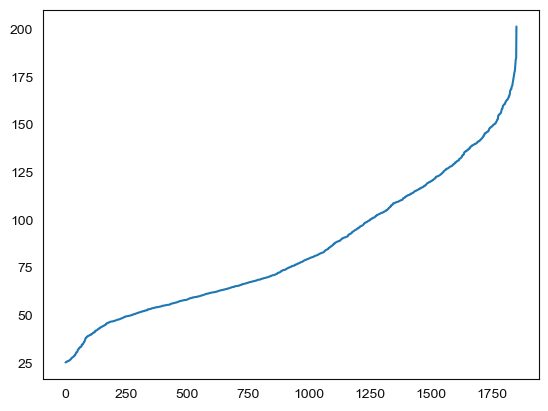

<Image layer 'volume' at 0x1e90ffa0450>

In [17]:
from skimage.filters import difference_of_gaussians
from skimage.feature import peak_local_max
import napari

v = difference_of_gaussians(volume, 4, 6)
tifffile.imwrite(save_path / "dog.tif", v)
print(v.max(), v.min(), v.mean())
pts = peak_local_max(v, min_distance=4, threshold_abs=25)
vals = v[pts[:, 0], pts[:, 1], pts[:, 2]]
plt.plot(sorted(vals))
plt.show()
viewer = napari.view_image(v)
viewer.add_points(pts, text=[str(l) for l in vals], size=10)
viewer.add_image(volume)